# Final Project Phase1
### Group 9
#### Contributors: Shanmukh, Parag, Hao

##### Version 0.1

In [8]:
# Import packages
%matplotlib inline
import pylab as plt
import pandas as pd
import numpy as np

In [9]:
# Loading the data file from github data folder
url="https://raw.githubusercontent.com/psiddam/FA18INFO-G9-PythonProject/master/Phase1/Data/Breast-Cancer-Wisconsin.csv"
df = pd.read_csv(url)

##### Verify for null values in the data frame

In [10]:
#Checking for null in data
df.isnull().any()

Scn      False
A2       False
A3       False
A4       False
A5       False
A6       False
A7       False
A8       False
A9       False
A10      False
CLASS    False
dtype: bool

#### Details of A7 column

In [11]:
#Checking for unique values in column A7
count = len(df["A7"].unique())
print("There are",count,"values in A7 Column")
print("Unique values are",df["A7"].unique())
print("Data type is:",df["A7"].dtype)

There are 11 values in A7 Column
Unique values are ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Data type is: object


#### Replace ? value in column A7 by NaN

In [12]:
#Replacing all ? values with NaN
df["A7"].replace(
    to_replace=['?'],
    value=np.NaN,
    inplace=True)

##### Details of A7 column after replacing ? to NaN

In [13]:
#Checking for unique values in column A7
print("There are",count,"values in A7 Column")
print("Unique values are",df["A7"].unique())
print("Data type is:",df["A7"].dtype)

There are 11 values in A7 Column
Unique values are ['1' '10' '2' '4' '3' '9' '7' nan '5' '8' '6']
Data type is: object


#### Convert A7 column to numeric

In [14]:
#Converting column A7 to numeric
#df["A7"]=pd.to_numeric(df["A7"],downcast="integer")
df.loc[:,"A7"]=df.loc[:,"A7"].apply(pd.to_numeric)
print("Data type for A7 after converting to numeric is",df["A7"].dtype)

Data type for A7 after converting to numeric is float64


#### Count of Nan Values from A7

In [15]:
#Counting null values of column A7
sc=df["A7"].isnull().sum()
print("Count of NaN values from A7 are", sc)

Count of NaN values from A7 are 16


#### Replace NaN values with mean of column A7

In [16]:
#replacing null values with mean
df.fillna(df.mean(skipna=True),inplace= True)

#### Column A7 Details after replacing NaN with Mean value

In [25]:
#Checking for unique values in column A7
count = len(df["A7"].unique())
print("There are",count,"values in A7 Column")
print("Unique values are",df["A7"].unique())
print("Data type is:",df["A7"].dtype)


There are 11 values in A7 Column
Unique values are [ 1.         10.          2.          4.          3.          9.
  7.          3.54465593  5.          8.          6.        ]
Data type is: float64


#### Summary Statistics of the data frame

In [26]:
#Calling describe method on df to get the summary statistics
print(df.describe())

                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.544656    3.437768    2.866953    1.589413    2.689557  
std      2.214300    3.601852    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.00000

#### Number of rows and columns in the data frame

In [27]:
#Using shape to findout number of rows and columns in the df
r,c =df.shape[:]
print("Data Frame has",r,"rows")
print("Data Frame has",c,"Columns")

Data Frame has 699 rows
Data Frame has 11 Columns


#### Unique id values from Scn column

In [20]:
uscn=len(df["Scn"].unique())
print("Scn column has",uscn,"unique values")

Scn column has 645 unique values


#### Historgrams for columns A2 to A10

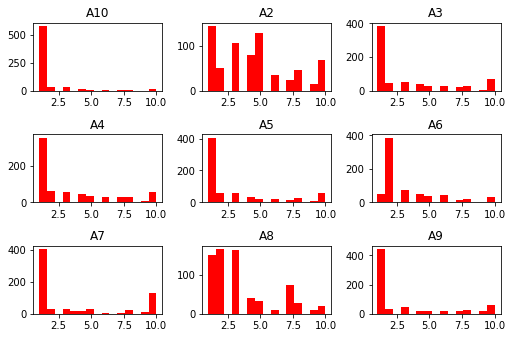

In [21]:
#Plotting histograms for all the columns
df.iloc[:,1:10].hist(grid=False,bins=15,color=["r"])
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

#### Bar Plot for CLASS column with count of  benign and malignant values 

Text(0.5,1,'Bar plot for clASS')

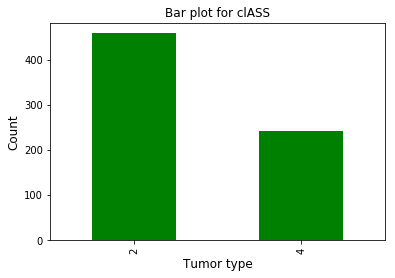

In [29]:
#Plotting bar plot for class column with count of benign and malignant values
selections = df['CLASS']
ax=selections.value_counts().plot(kind = "bar",color=["g"])
ax.set_xlabel("Tumor type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title("Bar plot for clASS")

#### Scatter plot

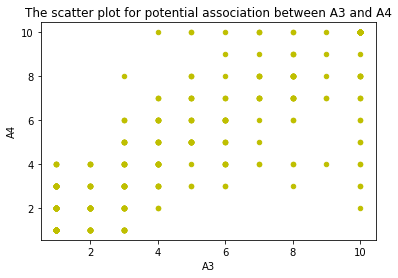

In [37]:
# Plotting scatter plot to visualize A3 and A4 columns
df.plot(kind='scatter',
        x='A3',
        y='A4',
        color="y",
        title="The scatter plot for potential association between A3 and A4")

In [24]:
#Summarize by reporting which values might need standardization in the future 
#(too much variation) and any other observations that you may discover as a Data Scientist.

According to the summary table above,

Potential relationship between marginal adhesion (A5) and class of breast cancer(CLASS) and the association of bare nuclei(A7) and class of breast cancer (CLASS) is our interest.

Besides, the outliner for each variable, for example, A10 has a small tail for 10, and most of the A10 are less than 2.5. So 10 could be considered as outliner and could be removed for additional analysis.
